In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
x,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [7]:
df=pd.DataFrame({'feature1':x[:,0],'feature2':x[:,1],'target':y})
print(df.shape)
df.head()

(100, 3)


,feature1,feature2,target
0,-0.444050,0.979568,-17.689883
1,-0.786828,0.929754,11.217030
2,-1.053279,-1.564772,-140.175975
3,1.447611,-1.138632,75.860299
4,0.375422,-0.428729,54.616422


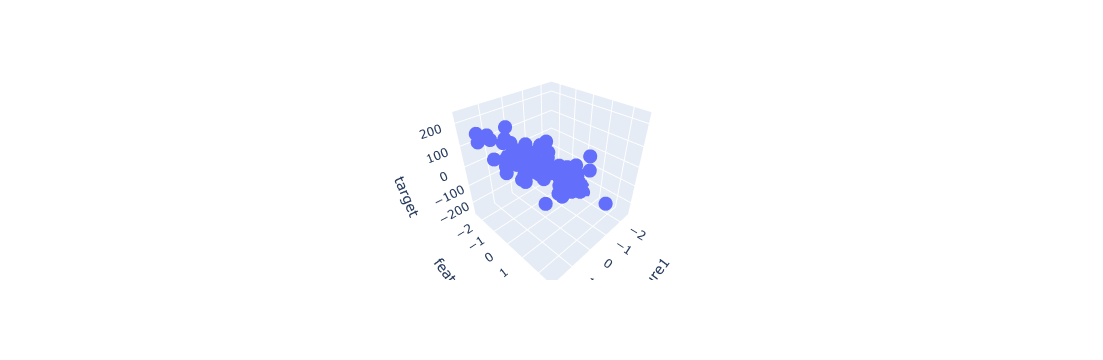

In [17]:
fig=px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(x_test)

In [23]:
print('MAE' , mean_absolute_error(y_test,y_pred))
print('MSE' , mean_squared_error(y_test,y_pred)) # will be high b/c calculated in square terms
print('R2 score' , r2_score(y_test,y_pred))  # how much target is explanable by all features

MAE 48.81173975716466
MSE 2955.2193645836333
R2 score 0.8146778627441313


In [26]:
x=np.linspace(-5,5,10)
y=np.linspace(-5,5,10)
xGrid,yGrid=np.meshgrid(x,y)

final=np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final=lr.predict(final).reshape(10,10)
z=z_final

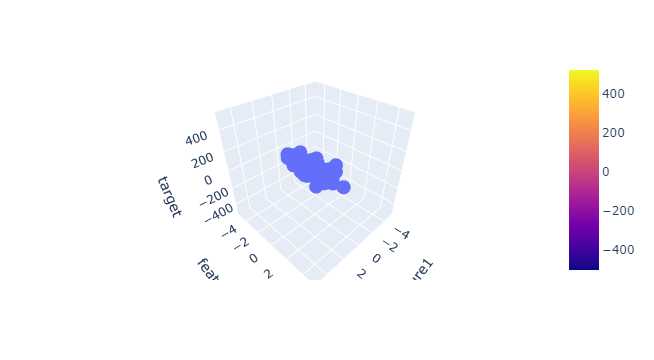

In [29]:
fig1=px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig1.add_trace(go.Surface(x=x,y=y,z=z))
fig1.show()

In [33]:
lr.coef_    # beta 1 and beta 2

array([91.13925952, 11.47788424])

In [32]:
lr.intercept_   #beta 0

7.133253766977535